# Proyecto 1: Entendimiento de los datos con PySpark

## Configuración e importe de paquetes
Se utilizará el paquete de pandas profiling para apoyar el análisis estadístico, y se importan los paquetes de python
necesarios

In [21]:
from pyspark.sql import SparkSession
from pyspark.sql import functions
from pyspark.sql.types import StructType
from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql.types import FloatType, StringType, IntegerType, DateType
from pyspark.sql.functions import udf, col, length, isnan, when, count
import pyspark.sql.functions as f
import os 
from datetime import datetime
from pyspark.sql import types as t
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

Configuración del controlador e inicio de sesion Spark



In [6]:
path_jar_driver = 'C:\legacyapps\connectorj\mysql-connector-java-8.4.0.jar'

In [7]:
#Configuración de la sesión
conf=SparkConf() \
    .set('spark.driver.extraClassPath', path_jar_driver)

spark_context = SparkContext(conf=conf)
sql_context = SQLContext(spark_context)
spark = sql_context.sparkSession

C:\Users\icgodmem\anaconda3\envs\tutoriales\lib\site-packages\pyspark\sql\context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [8]:
# Si quiere practicar la conexion con el servidor de base de datos:
db_connection_string = 'jdbc:mysql://157.253.236.116:8080/WWImportersTransactional'
# El usuario es su estudiante _i asignado y su contraseña la encontrará en el archivo excel de Coursera 
db_user = 'Estudiante_71_202413'
db_psswd = 'MISO_aabb1122'

PATH='./'

### Conexión a fuente de datos y acceso a los datos

#### Conexión a fuente de datos
A continuación encuentra las funciones para conectarse a la fuente de datos (archivo csv o base de datos) y retornar un dataframe que es el que se utilizará posteriormente para manipular los datos.

In [9]:
def obtener_dataframe_de_bd(db_connection_string, sql, db_user, db_psswd):
    df_bd = spark.read.format('jdbc')\
        .option('url', db_connection_string) \
        .option('dbtable', sql) \
        .option('user', db_user) \
        .option('password', db_psswd) \
        .option('driver', 'com.mysql.cj.jdbc.Driver') \
        .load()
    return df_bd

### Resumen

A partir de los resultados de actividades previas, debes hacer el entendimiento de los datos de una fuente de datos. El detalle lo encuentras en la guía de la tarea del entendimiento de los datos.  Utiliza  como ejemplo la infografía compartida del tema de entendimiento de datos. 

### Completitud del perfilamiento de datos (40 puntos)



#### Cargue de datos
Para consultar desde la base de datos se puede acceder directamente a la tabla dado su nombre o se puede especificar la sentencia SQL de un "SELECT" completo para traer la información total o parcial de la tabla que se requiere. A continuación un ejemplo de cada uno de estos usos. 
Acceso directo para el caso de órdenes y acceso con sentencia SQL para el caso de movimientosCopia.

In [10]:
sql_proyecciones = 'ProyectoTransaccional.proyeccionesCopia'

In [102]:
sql_pib = 'ProyectoTransaccional.PIBCopia'

In [103]:
sql_divipola = 'ProyectoTransaccional.divipolaCopia'

## Tabla proyeccionesCopia

In [12]:
proyecciones = obtener_dataframe_de_bd(db_connection_string, sql_proyecciones, db_user, db_psswd)

proyecciones.show(5)

+----+---+---------+-------------+-------------+
|Anio| DP|    DPNOM|Total Hombres|Total Mujeres|
+----+---+---------+-------------+-------------+
|2005| 25|antioquia|      2630787|      2830056|
|2006| 25|antioquia|      2663957|      2864164|
|2007| 25|antioquia|      2697202|      2897978|
|2008| 25|antioquia|      2730505|      2931594|
|2009| 25|antioquia|      2764235|      2966142|
+----+---+---------+-------------+-------------+
only showing top 5 rows



## Tabla pibCopia

In [104]:
pib = obtener_dataframe_de_bd(db_connection_string, sql_pib, db_user, db_psswd)

pib.show(5)

+----------------------------+-------------+-------+--------+--------------------+--------------------+--------+--------+--------------------+--------+
|CodigoDepartamento(DIVIPOLA)|DEPARTAMENTOS|   2006|    2007|                2008|                2010|    2011|    2012|                2013|    2014|
+----------------------------+-------------+-------+--------+--------------------+--------------------+--------+--------+--------------------+--------+
|                          41|         uila|6895658| 7441987|   8686536.103258422|    9548624.85406653|11113741|11400169|1.1967750469189592E7|12755711|
|                          18|     CaquetÃ¡|3575615| 4060678|   4519574.129383702|   5048396.606737779| 5516404| 6476778|    7161524.44383983| 7990249|
|                           8|   AtlÃ¡ntico|7194985| 8299825|   8858405.054387597|   9481200.322350295|10288314|11421539|1.2434114309437651E7|13681473|
|                          63|     QuindiÃ³|6350376| 6908084|  7449000.1041983375|   827

## Tabla Divipola

In [106]:
divipola = obtener_dataframe_de_bd(db_connection_string, sql_divipola, db_user, db_psswd)

divipola.show(5)

+-------------------+----------------+---------------------+-------------------+----------------+---------------------+-------------------+--------------+--------------+---------------+----------------------------------------+-------------------------+
|Código Departamento|Código Municipio|Código Centro Poblado|Nombre Departamento|Nombre Municipio|Nombre Centro Poblado|Tipo Centro Poblado|      Longitud|       Latitud|Nombre Distrito|Municipio/Áreas No Municipalizadas (ANM)|Nombre Área Metropolitana|
+-------------------+----------------+---------------------+-------------------+----------------+---------------------+-------------------+--------------+--------------+---------------+----------------------------------------+-------------------------+
|                 41|           91001|             91001033|           amazonas|           NEIVA| COMUNIDAD INDÍGEN...|     CENTRO POBLADO|-70.0285785394|-4.11198257304|               |                               MUNICIPIO|               

#### 1.1. Cantidad de registros y cantidad de columnas por tipo de dato


#### Tabla proyeccionesCopia

In [15]:
print(f"registros = {proyecciones.count()}", f"columnas = {len(proyecciones.columns)}")

registros = 330 columnas = 5


In [19]:
proyecciones.schema

StructType(List(StructField(Anio,IntegerType,true),StructField(DP,IntegerType,true),StructField(DPNOM,StringType,true),StructField(Total Hombres,IntegerType,true),StructField(Total Mujeres,IntegerType,true)))

In [24]:
Counter([col[1] for col in proyecciones.dtypes])

Counter({'int': 4, 'string': 1})

In [26]:
print((proyecciones.count(), len(proyecciones.columns)))

(330, 5)


Como se puede observar en la tabla proyecciones se tiene información acerca de los estimados de crecimiento de la poblacion de un lugar determinado, mas detalladamente se ve que se cuenta movimientos de productos, mas detalladamente se ve que se cuenta con el año, un codigo DP o identificador del departamento, el DPNOM o nombre de departamento y los totales proyectados de hombres y mujeres. Como se observa, en un principio, cada año cuenta con un valor para cada departamento y las cantidades de hombres y mujeres.

Para obtener la cantidad de registros y numero de columnas de la tabla proyecciones, se utiliza count y column para el dataframe. En total se tienen 5 variables, 4 son de tipo entero y 1 es de tipo cadena de caracter. Se tiene un total de 330 registros.

#### Tabla pibCopia

In [17]:
print(f"registros = {pib.count()}", f"columnas = {len(pib.columns)}")

registros = 27 columnas = 10


In [18]:
pib.schema

StructType(List(StructField(CodigoDepartamento(DIVIPOLA),LongType,true),StructField(DEPARTAMENTOS,StringType,true),StructField(2006,LongType,true),StructField(2007,LongType,true),StructField(2008,DoubleType,true),StructField(2010,DoubleType,true),StructField(2011,LongType,true),StructField(2012,LongType,true),StructField(2013,DoubleType,true),StructField(2014,LongType,true)))

In [27]:
Counter([col[1] for col in pib.dtypes])

Counter({'bigint': 6, 'string': 1, 'double': 3})

In [28]:
print((pib.count(), len(pib.columns)))

(27, 10)


Como se puede observar en la tabla pib se tiene información acerca del producto interno bruto (PIB) correspondiente a diferentes departamentos a lo largo de diferentes años como lo son 2006, 2007, 2008, 2010, 2011, 2012, 2013 y donde a su vez cada departamento tiene asociado un codigo departamento que viene de la tabla DIVIPOLA.

Para obtener la cantidad de registros y numero de columnas de la tabla pib, se utiliza count y column para el dataframe. En total se tienen 10 variables, 6 son de tipo numerico y 1 es de tipo cadena de caracter y 3 son de tipo decimal. Se tiene un total de 27 registros.

Para obtener la cantidad de registros y numero de columnas de la tabla movimientos, se utiliza count y column para el dataframe

#### 1.2. Significado de una fila


#### Tabla proyeccionesCopia

Para describir el significado de una fila en la tabla de proyecciones, se mostraran algunos registros y se realizara un agrupamiento utilizando alguna de las llaves foraneas si existen de la tabla proyecciones, en este caso no se ven llaves foraneas pero se podria agrupar por la columna año

In [29]:
proyecciones.show(5)
proyecciones.groupby("Anio").count().orderBy("count", ascending=False).show(5)

+----+---+---------+-------------+-------------+
|Anio| DP|    DPNOM|Total Hombres|Total Mujeres|
+----+---+---------+-------------+-------------+
|2005| 25|antioquia|      2630787|      2830056|
|2006| 25|antioquia|      2663957|      2864164|
|2007| 25|antioquia|      2697202|      2897978|
|2008| 25|antioquia|      2730505|      2931594|
|2009| 25|antioquia|      2764235|      2966142|
+----+---+---------+-------------+-------------+
only showing top 5 rows

+----+-----+
|Anio|count|
+----+-----+
|2007|   33|
|2006|   33|
|2013|   33|
|2014|   33|
|2012|   33|
+----+-----+
only showing top 5 rows



In [30]:
proyecciones.filter(proyecciones["Anio"] == 2007).show(5)

+----+---+------------+-------------+-------------+
|Anio| DP|       DPNOM|Total Hombres|Total Mujeres|
+----+---+------------+-------------+-------------+
|2007| 25|   antioquia|      2697202|      2897978|
|2007| 25|   atlantico|      1055195|      1119793|
|2007| 25|bogota, d.c.|      3312248|      3572321|
|2007| 25|     bolivar|       912524|       933439|
|2007| 25|      boyaca|       562966|       586943|
+----+---+------------+-------------+-------------+
only showing top 5 rows



Con el resultado de las consultas se puede concluir que una fila en la tabla de proyecciones representa un dato estimado del crecimiento que tendra la población de un determinado lugar en un año especifico. Cada año como se observa puede tener los datos de diferentes departamentos separando las proyección de crecimiento tanto para hombre y mujeres. Hay un dato que en principio parece constante, el cual es la columna DP que en analisis posteriores se verificara individualmente.

#### Tabla pibCopia

Para describir el significado de una fila en la tabla de pib, se mostraran algunos registros y se realizara un agrupamiento utilizando alguna de las llaves foraneas si existen de la tabla pib, en este caso se la llave CodigoDepartamento que viene de la tabla divipola.

In [32]:
pib.show(5)
pib.groupby("CodigoDepartamento(DIVIPOLA)").count().orderBy("count", ascending=False).show(5)

+----------------------------+-------------+-------+--------+--------------------+--------------------+--------+--------+--------------------+--------+
|CodigoDepartamento(DIVIPOLA)|DEPARTAMENTOS|   2006|    2007|                2008|                2010|    2011|    2012|                2013|    2014|
+----------------------------+-------------+-------+--------+--------------------+--------------------+--------+--------+--------------------+--------+
|                          41|         uila|6895658| 7441987|   8686536.103258422|    9548624.85406653|11113741|11400169|1.1967750469189592E7|12755711|
|                          18|     CaquetÃ¡|3575615| 4060678|   4519574.129383702|   5048396.606737779| 5516404| 6476778|    7161524.44383983| 7990249|
|                           8|   AtlÃ¡ntico|7194985| 8299825|   8858405.054387597|   9481200.322350295|10288314|11421539|1.2434114309437651E7|13681473|
|                          63|     QuindiÃ³|6350376| 6908084|  7449000.1041983375|   827

In [33]:
pib.filter(pib["CodigoDepartamento(DIVIPOLA)"] == 18).show(5)

+----------------------------+-------------+-------+-------+-----------------+-----------------+-------+-------+----------------+-------+
|CodigoDepartamento(DIVIPOLA)|DEPARTAMENTOS|   2006|   2007|             2008|             2010|   2011|   2012|            2013|   2014|
+----------------------------+-------------+-------+-------+-----------------+-----------------+-------+-------+----------------+-------+
|                          18|     CaquetÃ¡|3575615|4060678|4519574.129383702|5048396.606737779|5516404|6476778|7161524.44383983|7990249|
|                          18|     CaquetÃ¡|3575615|4060678|4519574.129383702|5048396.606737779|5516404|6476778|7161524.44383983|7990249|
+----------------------------+-------------+-------+-------+-----------------+-----------------+-------+-------+----------------+-------+



Con el resultado de las consultas se puede concluir que una fila en la tabla de pib representa un dato de la evolución a lo largo del tiempo del producto interno bruto de un departamento determinado, donde se detalla a su vez el codigo del departamento registrado. Se observa además, que cada codigo y departamento aparece más de una vez, por lo cual estos registros se incluiran en analisis posteriores.

#### 1.3 Estadisticas descriptivas por columna (numérica, categórica, fechas) 

#### Tabla proyeccionesCopia

Para la generación de las estadísticas descriptivas por columna de la tabla de proyecciones, se ejecuta el comando de summary

In [36]:
proyecciones.summary().show()

+-------+-----------------+----+--------+-----------------+------------------+
|summary|             Anio|  DP|   DPNOM|    Total Hombres|     Total Mujeres|
+-------+-----------------+----+--------+-----------------+------------------+
|  count|              330| 330|     330|              330|               330|
|   mean|           2009.5|25.0|    null|650666.4242424242| 843740.4454545454|
| stddev|2.876643180486918| 0.0|    null|751024.7851013226|3097897.0672473223|
|    min|             2005|  25|amazonas|            13825|             11636|
|    25%|             2007|  25|    null|           173396|            170374|
|    50%|             2009|  25|    null|           477977|            489035|
|    75%|             2012|  25|    null|           777720|            795592|
|    max|             2014|  25| vichada|          3476538|          55000000|
+-------+-----------------+----+--------+-----------------+------------------+



In [37]:
proyecciones.filter(proyecciones["Anio"] == 2014).filter(proyecciones["DPNOM"] == "valle del cauca").show(5)

+----+---+---------------+-------------+-------------+
|Anio| DP|          DPNOM|Total Hombres|Total Mujeres|
+----+---+---------------+-------------+-------------+
|2014| 25|valle del cauca|      2110069|      2281395|
+----+---+---------------+-------------+-------------+



En las estadísticas anteriores vemos que el conteo de todas las columnas da un total de 330, es decir son columnas con algun tipo de contenido por lo cual No se puede eliminar de momento ninguna columna del set de datos, tambien se observa que se realiza el calculo de la media para la columna categoria DPNOM o nombre departamento, sin embargo como los datos son diferentes no tiene sentido calcular la media o desviación estandar, o los percentiles, por lo cual el valor aparece en null.
Se puede ver para la Columna Anio que al ser valores numericos se realizan los calculos estadisticos, sin embargo la media sin ser un año exacto carece de sentido. Si embargo, los datos de minimo y maximo con valores de 2005 y 20014 nos sirven para acotar el periodo de año de la información registrada.
Se empieza a ver inconsistencias en la regla # 2 que indica que la información de la tabla proyecciones va desde 2005 hasta 2015 y en lo que se ve solo se tienen datos hasta 2014. Por lo cual se reportara esta situación al negocio. La información de proyecciones va hasta el 2015? o hace falta la informacion de ese año?

DP: Según el diccionario de datos esta columna representa el identificador del departamento, sin embargo, se observa que hay distintos departamentos y todos tienen el mismo código, por lo cual se validara con el negocio esta información.
El codigo de departamento DP es diferente para cada departamento en la tabla proyecciones? Si es asi, cual es el valor de DP para cada departamento?

Analizando la busqueda filtrada de proyecciones para el departamento valle del cauca del año 2014 para total de hombres, se que es la misma cantidad indicada por la regla # 3 o 2110069, por lo cual esta regla es correcta.

Total Hombres: Se tiene una media de 650666 para la proyección de hombres, sin embargo la desviación estandar es elevada con un valor de 751024 lo cual es esperado para datos poryectados los cuales pueden crecer de forma exponencial en el tiempo.

Total Mujeres: Se tiene una media de 843740 para la proyección de mujeres, sin embargo la desviación estandar es elevada con un valor de 3097897 lo cual es esperado para datos poryectados los cuales pueden crecer de forma exponencial en el tiempo.


Ahora vamos a revisar el formato de la columna Anio

In [64]:
regex = "(0[1-9]|[1-2][0-9]|3[0-1])"
totalRegistros = proyecciones.count()
cumplenFormato = proyecciones.filter(proyecciones["Anio"].rlike(regex))
noCumplenFormato = proyecciones.filter(~proyecciones["Anio"].rlike(regex))
nullFecha = proyecciones.filter(proyecciones["Anio"].isNull())
print("Número total de proyecciones: "+str(totalRegistros)+", número de proyecciones con formato correcto: "+str(cumplenFormato.count()))
print("Número total de proyecciones: "+str(totalRegistros)+", número de proyecciones con formato Incorrecto: "+str(noCumplenFormato.count()))
print("Número total de proyecciones: "+str(totalRegistros)+", número de proyecciones en null: "+str(nullFecha.count()))
noCumplenFormato.show(10)
nullFecha.show(10)

Número total de proyecciones: 330, número de proyecciones con formato correcto: 330
Número total de proyecciones: 330, número de proyecciones con formato Incorrecto: 0
Número total de proyecciones: 330, número de proyecciones en null: 0
+----+---+-----+-------------+-------------+
|Anio| DP|DPNOM|Total Hombres|Total Mujeres|
+----+---+-----+-------------+-------------+
+----+---+-----+-------------+-------------+

+----+---+-----+-------------+-------------+
|Anio| DP|DPNOM|Total Hombres|Total Mujeres|
+----+---+-----+-------------+-------------+
+----+---+-----+-------------+-------------+



Se observa que los años tienen el formato correcto.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ecbe045948>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecbe048148>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecbe045088>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecbe04f388>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecbe048e08>],
 'means': []}

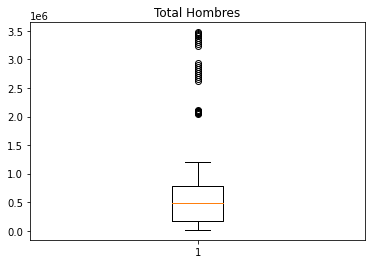

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Total Hombres')
ax1.boxplot(np.array(proyecciones.select('Total Hombres').collect()))

Obseranvando el diagrama de caja para la columna hombres, se encuentra que los datos estan distribuidos y no se observan valores atipicos.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ecbdf87ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecbdf8c2c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecbdf87208>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecbdf904c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecbdf8cf48>],
 'means': []}

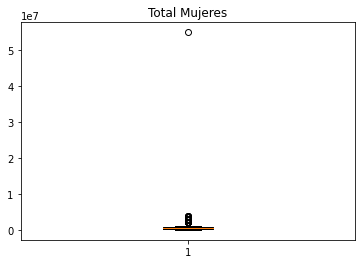

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Total Mujeres')
ax1.boxplot(np.array(proyecciones.select('Total Mujeres').collect()))

Obseranvando el diagrama de caja para la columna total mujeres, se encuentran valores atipicos que deberan ser aclarados con el negocio.

In [76]:
proyecciones.filter(proyecciones["Total Mujeres"] > 5e7).show(5)

+----+---+-------+-------------+-------------+
|Anio| DP|  DPNOM|Total Hombres|Total Mujeres|
+----+---+-------+-------------+-------------+
|2009| 25|vichada|        47300|     55000000|
+----+---+-------+-------------+-------------+



El valor de proyeccion de Total Mujeres para el año 2009 y el departamento vichada es correcto?

In [65]:
corrp = proyecciones.toPandas().corr(method='pearson')
corrp.style.background_gradient(cmap='coolwarm')

C:\Users\icgodmem\anaconda3\envs\tutoriales\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\icgodmem\anaconda3\envs\tutoriales\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Anio,DP,Total Hombres,Total Mujeres
Anio,1.000000,nan,0.026346,-0.002607
DP,nan,nan,nan,nan
Total Hombres,0.026346,nan,1.000000,0.218155
Total Mujeres,-0.002607,nan,0.218155,1.000000


No se observa correlacion alguna entre las columnas del conjunto de datos.

Reporte de perfilamiento

In [70]:
PATH='./'
reporte = ProfileReport(proyecciones.toPandas())

In [71]:
reporte.to_file(PATH+"proyecciones_reporte_perfilamiento.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Resumen general del reporte de perfilamiento

- Se tienen 5 variables y 330 registros o proyecciones, de estas variables 3 son numericas y 2 son categoricas. Se observa que  no ha datos vacíos. (conclusion)
- El archivo ocupa un tamaño en memoria de 7.9 KiB.
- El set de datos contiene un 0.0% de registros duplicados.

#### Seccion de variables:

- Para cada variable se tienen datos estadisticos como la media, el minimo y máximo, asi como tambien un histograma de distribución de la variable. Para los datos se observa solamente un valor extremo en la columna Total Mujeres que debera ser aclarado con el negocio.
- Las variables DPNOM y Anio son uniformes
- La variable DP es constante
- Las variables DPNOM,Total Hombres y Total Mujeres tienen alta correlación.

#### Seccion de interacciones y correlaciones:

El gráfico de correlación de Spearman's parece indicar correlaciones cercanas a 1 entre algunas variables, esto significa que ambas columnas representan la misma información, esto es verdad ya que el incremento de una población a lo largo del tiempo se puede tratar de forma conjunta para hombre y mujeres o se puede tratar de forma individual, sin embargo su comportamiento con tendencia al alza o a la baja es en la mayoria de departamentos el mismo.

#### Tabla pibCopia

Para la generación de las estadísticas descriptivas por columna de la tabla de movimientos, se ejecuta el comando de summary

In [35]:
pib.summary().show()

+-------+----------------------------+-------------+------------------+-----------------+-------------------+--------------------+-----------------+--------------------+--------------------+--------------------+
|summary|CodigoDepartamento(DIVIPOLA)|DEPARTAMENTOS|              2006|             2007|               2008|                2010|             2011|                2012|                2013|                2014|
+-------+----------------------------+-------------+------------------+-----------------+-------------------+--------------------+-----------------+--------------------+--------------------+--------------------+
|  count|                          27|           27|                27|               27|                 27|                  27|               27|                  27|                  27|                  27|
|   mean|            48.7037037037037|         null| 6413240.740740741|7130828.037037037|  7851694.186446355|   8737185.290427044|9728735.962962963|1.03

En las estadísticas anteriores vemos que el conteo de todas las columnas da un total de 27, es decir son columnas con algun tipo de contenido por lo cual No se puede eliminar de momento ninguna columna del set de datos, tambien se observa que se realiza el calculo de la media para la columna categoria  departamentos, sin embargo como los datos son diferentes no tiene sentido calcular la media o desviación estandar, o los percentiles, por lo cual el valor aparece en null.
Tambien se observa que se realizan los calculos de media, desviación estandar, minimo, maximo y cuartiles para la columna codigoDepartamento(DIVIPOLA) sin embargo esta al ser una llave foranea carece de sentido analizar estos calculos.

Revisando la regla # 1, se tiene que la informacion del PIB es desde los años 2005 hasta 2018 para los 32 departamentos, sin embargo, se ven columnas de datos para los años 2006,2007,2008,2010,2011,2012,2013 y 2014. Pero hace falta informacion de los años 2005,2009,2015,2016,2017 y 2018, adicionalmente según el conteo de registros, se tienen 27 departamentos pero la regla indica 32.
Esta disponible la información de PIB para los años 2005,2009,2015,2016,2017,2018 y para los 32 departamentos?

Columnas años: Se observa que se realiza el calculo de los estadisticos de media, desviación estandar la cual varia entre 2611248 y 5118298 lo cual se ve razonable y el calculo de valores minimo y máximo que se ven normales para la distribución de datos presentada.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ecb5545c08>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecb5549408>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecb5545388>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecb554d648>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecb554dc88>],
 'means': []}

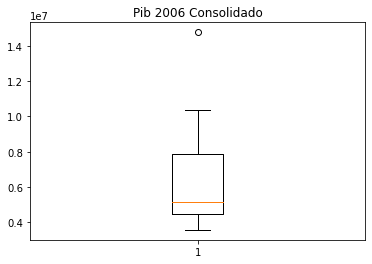

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Pib 2006 Consolidado')
ax1.boxplot(np.array(pib.select('2006').collect()))

En el diagrama de cajas anterior podemos observar que la variable 2006 no tiene valores extremos.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ecb55c4d88>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecb55c7588>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecb55c4488>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecb55cc788>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecb55ccdc8>],
 'means': []}

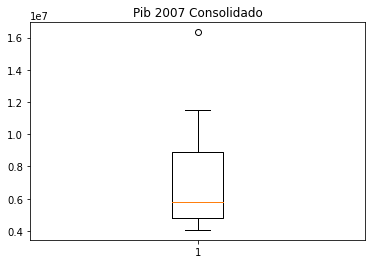

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Pib 2007 Consolidado')
ax1.boxplot(np.array(pib.select('2007').collect()))

En el diagrama de cajas anterior podemos observar que la variable 2007 no tiene valores extremos.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ecb5644788>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecb5644708>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecb563fa88>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecb5650148>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecb564abc8>],
 'means': []}

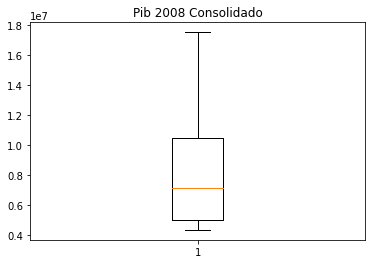

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Pib 2008 Consolidado')
ax1.boxplot(np.array(pib.select('2008').collect()))

En el diagrama de cajas anterior podemos observar que la variable 2008 no tiene valores extremos.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ecb668f888>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecb6693f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecb6693288>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecb669f048>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecb669aac8>],
 'means': []}

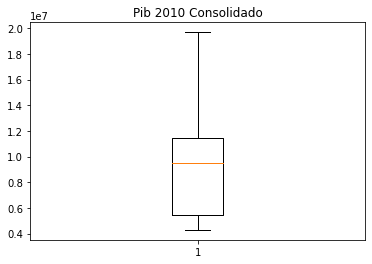

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Pib 2010 Consolidado')
ax1.boxplot(np.array(pib.select('2010').collect()))

En el diagrama de cajas anterior podemos observar que la variable 2010 no tiene valores extremos.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ecb6716448>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecb6719fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecb6716d88>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecb671ebc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecb671ee08>],
 'means': []}

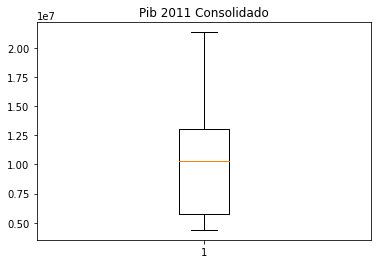

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Pib 2011 Consolidado')
ax1.boxplot(np.array(pib.select('2011').collect()))

En el diagrama de cajas anterior podemos observar que la variable 2011 no tiene valores extremos.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ecb6791448>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecb6793d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecb6791fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecb679b9c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecb679b888>],
 'means': []}

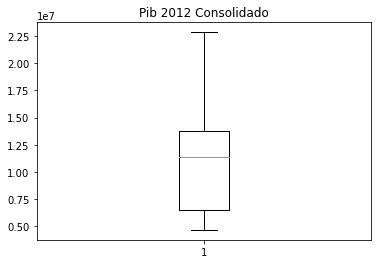

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Pib 2012 Consolidado')
ax1.boxplot(np.array(pib.select('2012').collect()))

En el diagrama de cajas anterior podemos observar que la variable 2012 no tiene valores extremos.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ecb67f4488>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecb6816d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecb6810fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecb6819988>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecb6819f88>],
 'means': []}

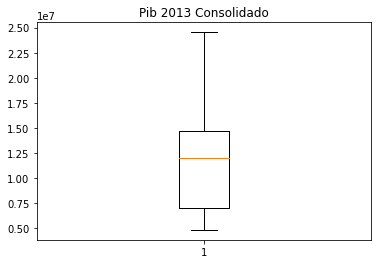

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Pib 2013 Consolidado')
ax1.boxplot(np.array(pib.select('2013').collect()))

En el diagrama de cajas anterior podemos observar que la variable 2013 no tiene valores extremos.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ecb68930c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecb68986c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecb6893a88>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecb689e8c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecb689ef08>],
 'means': []}

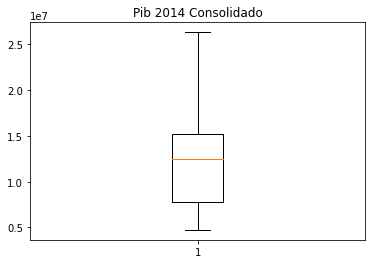

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Pib 2014 Consolidado')
ax1.boxplot(np.array(pib.select('2014').collect()))

En el diagrama de cajas anterior podemos observar que la variable 2014 no tiene valores extremos.

In [ ]:
Ahora vamos a revisar los diferentes CodigoDepartamento(DIVIPOLA)

In [50]:
pib.groupby("CodigoDepartamento(DIVIPOLA)").count().orderBy("count", ascending=False).show()

+----------------------------+-----+
|CodigoDepartamento(DIVIPOLA)|count|
+----------------------------+-----+
|                          95|    2|
|                          94|    2|
|                          99|    2|
|                          86|    2|
|                          76|    2|
|                          18|    2|
|                          41|    2|
|                          15|    2|
|                          23|    2|
|                           8|    2|
|                          54|    1|
|                          11|    1|
|                           0|    1|
|                          20|    1|
|                          63|    1|
|                          52|    1|
|                           5|    1|
+----------------------------+-----+



Se observa que cada departamento deberia tener un solo registro de pib pero se observan varios registros que tienen mas de un dato, con lo cual se confirma que la regla # 1 no es valida

In [52]:
pib.groupby("DEPARTAMENTOS").count().orderBy("count", ascending=False).show()

+--------------------+-----+
|       DEPARTAMENTOS|count|
+--------------------+-----+
|          AtlÃ¡ntico|    2|
|            CaquetÃ¡|    2|
|boyacaaaaaaaaaaaa...|    2|
|            PUTUMAYO|    2|
|             cordoba|    2|
|                uila|    2|
|             VICHADA|    2|
|              GUANIA|    2|
|            el valle|    2|
|            guaviare|    2|
|           ANTIOQUIA|    1|
|            El Cesar|    1|
|            norte de|    1|
|Bogota distrito c...|    1|
|            QuindiÃ³|    1|
|Republica de Colo...|    1|
|             NARIÃ‘O|    1|
+--------------------+-----+



Se observa que cada departamento deberia tener un solo registro de pib pero se observan varios registros que tienen mas de un dato, con lo cual se confirma que la regla # 1 no es valida

Ahora revisamos los datos distintos para los valores de PIB

In [54]:
pib.select(col('2006')).distinct().count()

17

In [55]:
pib.select(col('2007')).distinct().count()

17

In [56]:
pib.select(col('2008')).distinct().count()

17

In [57]:
pib.select(col('2010')).distinct().count()

17

In [58]:
pib.select(col('2011')).distinct().count()

17

In [59]:
pib.select(col('2012')).distinct().count()

17

In [60]:
pib.select(col('2013')).distinct().count()

17

In [61]:
pib.select(col('2014')).distinct().count()

17

Se confirma nuevamente el fallo de la regla de PIB ya que faltan departamentos para completar los 32 y ademas hay algunos registros duplicados

In [67]:
corrpib = pib.toPandas().corr(method='pearson')
corrpib.style.background_gradient(cmap='coolwarm')

,CodigoDepartamento(DIVIPOLA),2006,2007,2008,2010,2011,2012,2013,2014
CodigoDepartamento(DIVIPOLA),1.000000,-0.425295,-0.467128,-0.465807,-0.428861,-0.441411,-0.473087,-0.445658,-0.485629
2006,-0.425295,1.000000,0.994164,0.982879,0.955232,0.916324,0.930583,0.905970,0.920686
2007,-0.467128,0.994164,1.000000,0.989876,0.966372,0.931221,0.946666,0.926138,0.943218
2008,-0.465807,0.982879,0.989876,1.000000,0.988965,0.969576,0.978419,0.959372,0.968689
2010,-0.428861,0.955232,0.966372,0.988965,1.000000,0.991846,0.995095,0.988389,0.989140
2011,-0.441411,0.916324,0.931221,0.969576,0.991846,1.000000,0.997546,0.992940,0.987098
2012,-0.473087,0.930583,0.946666,0.978419,0.995095,0.997546,1.000000,0.994081,0.992918
2013,-0.445658,0.905970,0.926138,0.959372,0.988389,0.992940,0.994081,1.000000,0.996377
2014,-0.485629,0.920686,0.943218,0.968689,0.989140,0.987098,0.992918,0.996377,1.000000


En el caso de el conjunto de datos de PIB, se ve una fuerte correlacion entre los diferentes años, debido a que todos los datos se encuentran relacionados en el tiempo, esto indica que si los datos se graficaran, seria posible obtener una linea de tendencia con su ecuación que permita predecir el valor de PIB de otros años no presentes en el conjunto de datos.

Reporte de perfilamiento

In [77]:
PATH='./'
reporte = ProfileReport(pib.toPandas())


In [78]:
reporte.to_file(PATH+"pib_reporte_perfilamiento.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Resumen general del reporte de perfilamiento

- Se tienen 10 variables y 27 registros o datos de pib, de estas variables 9 son numericas y 1 es categorica. Se observa que  no ha datos vacíos. (conclusion)
- El archivo ocupa un tamaño en memoria de 2.2 KiB.
- El set de datos contiene un 37.0% de registros duplicados.

#### Seccion de variables:

- Para cada variable se tienen datos estadisticos como la media, el minimo y máximo, asi como tambien un histograma de distribución de la variable. Para los datos no se observa nada por fuera de lo común como valores extremos.

- Las variables OrdenDeCompraID u  FechaTransaccion tienen alta cardinalidad
- Las variables CodigoDepartamento, Departamentos, 2006,2007,2008,2010,2011,2012,2013,2014, tienen alta correlación.
- La variable CodigoDepartamento tiene valores en Zero, 1 en particular.
- Las variables Departamentos, tiene algunos datos uniformes


#### Seccion de interacciones y correlaciones:

El gráfico de correlación de Spearman's parece indicar correlaciones cercanas a 1 entre la mayoria de variables correspondiente al pib anual de las variables variables analizadas, esto significa que ambas columnas representan la misma información, que si bien es de años diferentes, puede llegar a relacionarse y derivarse mediante una ecuación o curva de tendencia, la cual es muy util para saber el valor del PIb de cierto departamento en un año pasado o futuro teniendo la suficiente cantidad de datos y alta correlacion para derivar la curva apropiada.

### Completitud del análisis de la calidad de datos (40 puntos) 

#### 2.1. Completitud: Datos que no existen o no se conocen

#### 2.2. Unicidad: Datos que son idénticos en diferentes registros o registros con valores idénticos en atributos en los que no debería ocurrir

#### 2.3. Consistencia: Esta medida se define por la validez o integridad del dato, en la definición de su estructura, al interior de una fila o entre diferentes filas de la misma fuente o de diferentes fuentes. El manejo de unidades en los datos y el significado del dato son generadores de inconsistencias.

#### 2.4 Validez: Datos correctos en el contextoCompletitud del análisis de la calidad de datos

### Unicidad y validez

La sección de valides se analizo con los analisis de las reglas de negocio 1, 2 y 3 de la sección 1.3.

#### Tabla proyeccionesCopia

La unicidad se valida comprobando si existen proyecciones repetidas o identicas.

In [84]:
proyeccionesDistintas = proyecciones.distinct().count()
totalProyecciones = proyecciones.count()
diferenciaProyecciones = totalProyecciones - proyeccionesDistintas
print("Proyecciones totales: " + str(totalProyecciones))
print("Proyecciones distintos: " + str(proyeccionesDistintas))

print("Proyecciones repetidas: " + str(diferenciaProyecciones))

Proyecciones totales: 330
Proyecciones distintos: 330
Proyecciones repetidas: 0


Del conteo anterior se puede observar que no se tienen proyecciones repetidas

#### Tabla pibCopia

La unicidad se valida comprobando si existen pibs repetidos o identicos.

In [87]:
pibDistintas = pib.distinct().count()
totalPib = pib.count()
diferenciaPib = totalPib - pibDistintas
print("PIB totales: " + str(totalPib))
print("PIB distintos: " + str(pibDistintas))

print("PIB repetidas: " + str(diferenciaPib))

PIB totales: 27
PIB distintos: 17
PIB repetidas: 10


Del conteo anterior se puede observar que se tienen 10 pibs repetidos ya que los pib distintos no coinciden con la cantidad de pib totales.

In [88]:
import math
print(str(math.ceil(diferenciaPib / totalPib * 100))+"%")

38%


Se tiene un 38% de registros repetidos, lo cual indica que hay un error con los datos y se debe notificar al negocio para entender la situación y decidir si se pueden borrar completamente estos registros.

In [98]:
pib.groupby("CodigoDepartamento(DIVIPOLA)").count().filter(col("count") > 1).show(5)

+----------------------------+-----+
|CodigoDepartamento(DIVIPOLA)|count|
+----------------------------+-----+
|                          94|    2|
|                          95|    2|
|                          41|    2|
|                           8|    2|
|                          76|    2|
+----------------------------+-----+
only showing top 5 rows



El anterior es una muestra de los registros duplicados en proyecciones

### Completitud y validez

In [90]:
from pyspark.sql.functions import trim
def contar_vacios(df):
    resultados = []
    for c in df.columns:
        vacios = df.filter(df[c].isNull()).count()
        if vacios!=0:
            print('número de vacíos para columna '+c+': '+str( vacios ))
            resultados.append(vacios)
        else:
            vacios = df.filter(trim(df[c])=="").count()
            if vacios!=0:
                print('número de vacíos para columna '+c+': '+str( vacios ))
                resultados.append(vacios)
    return resultados

def cardinalidad(df):
    resultado = {}
    for c in df.columns:
        cardinalidad = df.select(col(c)).distinct().count()
        if cardinalidad>=df.count()*0.5:
            resultado[c] = cardinalidad
    return resultado

#### Tabla proyeccionesCopia

In [91]:
print("Proyecciones analisis de vacios ")
columnas_vacias_proyecciones = contar_vacios(proyecciones)
print("Proyecciones analisis de cardinalidad ")
columnas_alta_cardinalidad_proyecciones = cardinalidad(proyecciones)
print(columnas_alta_cardinalidad_proyecciones)

Proyecciones analisis de vacios 
Proyecciones analisis de cardinalidad 
{'Total Hombres': 329, 'Total Mujeres': 329}


No se observan registros vacios en la tabla proyecciones

#### Tabla pibCopia

In [92]:
print("Pib analisis de vacios ")
columnas_vacias_pib = contar_vacios(pib)
print("Pib analisis de cardinalidad ")
columnas_alta_cardinalidad_pib = cardinalidad(pib)
print(columnas_alta_cardinalidad_pib)

Pib analisis de vacios 
Pib analisis de cardinalidad 
{'CodigoDepartamento(DIVIPOLA)': 17, 'DEPARTAMENTOS': 17, '2006': 17, '2007': 17, '2008': 17, '2010': 17, '2011': 17, '2012': 17, '2013': 17, '2014': 17}


In [97]:
print(str(columnas_alta_cardinalidad_pib['CodigoDepartamento(DIVIPOLA)']/totalPib*100))

62.96296296296296


No se tienen vacios en la tabla Pib

Con respecto a la columna Codigo Departamento divipola se observa que tiene una cardinalidad del 63%

### Consistencia

#### Tabla proyeccionesCopia

A nivel de consistencia para proyecciones solo se nota que el valor DP o codigo de departamento se encuentra constante, lo cual ya se anoto en el analisis estadistico de la tabla.

In [112]:
proyecciones.select(col('DP')).distinct().show()

+---+
| DP|
+---+
| 25|
+---+



In [114]:
proyecciones.filter(proyecciones["DPNOM"] == 'nariÃ±o').show(5)

+----+---+-------+-------------+-------------+
|Anio| DP|  DPNOM|Total Hombres|Total Mujeres|
+----+---+-------+-------------+-------------+
|2005| 25|nariÃ±o|       746790|       763664|
|2006| 25|nariÃ±o|       753747|       771363|
|2007| 25|nariÃ±o|       759963|       778291|
|2008| 25|nariÃ±o|       765214|       784359|
|2009| 25|nariÃ±o|       769713|       790034|
+----+---+-------+-------------+-------------+
only showing top 5 rows



Se observa un problema de consistencia en la columna DPNOM ya que el departamento es conocido como nariño y tiene almacenados caracteres raros, por lo cual se reporta con el negocio.

El caracter Ã± corresponde a alguna letra particular o usa encoding para almacenar el dato?

#### Tabla pibCopia

A nivel de consistencia se revisa los valores de la columna CodigoDepartamento(DIVIPOLA) de la tabla proyeccionesCopia en relación con el tipo de codigo departamento de la tabla divipolaCopia. En este caso vamos se verificar que todos los CodigoDepartamento(DIVIPOLA) esten presentes en la tabla dipolaCopia.

In [108]:
pib.select(col('CodigoDepartamento(DIVIPOLA)')).distinct().show()

+----------------------------+
|CodigoDepartamento(DIVIPOLA)|
+----------------------------+
|                          54|
|                           0|
|                          94|
|                          95|
|                          63|
|                          52|
|                          41|
|                           5|
|                           8|
|                          11|
|                          76|
|                          18|
|                          15|
|                          23|
|                          20|
|                          99|
|                          86|
+----------------------------+



In [110]:
divipola.select(col('Código Departamento')).distinct().show()

+-------------------+
|Código Departamento|
+-------------------+
|                 41|
+-------------------+



Se observa un problema de consistencia debido a que solo se tiene el codigo 41 en la tabla de divipola, mientras en la tabla PIB se usan 17 codigos incluyendo el 0.

In [119]:
pib.show(10)

+----------------------------+--------------------+-------+--------+--------------------+--------------------+--------+--------+--------------------+--------+
|CodigoDepartamento(DIVIPOLA)|       DEPARTAMENTOS|   2006|    2007|                2008|                2010|    2011|    2012|                2013|    2014|
+----------------------------+--------------------+-------+--------+--------------------+--------------------+--------+--------+--------------------+--------+
|                          41|                uila|6895658| 7441987|   8686536.103258422|    9548624.85406653|11113741|11400169|1.1967750469189592E7|12755711|
|                          18|            CaquetÃ¡|3575615| 4060678|   4519574.129383702|   5048396.606737779| 5516404| 6476778|    7161524.44383983| 7990249|
|                           8|          AtlÃ¡ntico|7194985| 8299825|   8858405.054387597|   9481200.322350295|10288314|11421539|1.2434114309437651E7|13681473|
|                          63|            Quin

A nivel de contenido de la columna DEPARTAMENTOS, se observan departamentos con nombres con caracteres especiales y datos que no tienen sentido como uila o boyacaaaaa. Se debe verificar esta columna en su totalidad con el negocio.

In [ ]:
La columna DEPARTAMENTOS de la tabla PIBCopia puede restaurarse o descartarse por completo?

### Conclusión del entendimiento de datos (20 puntos)

#### 3.1. Justificación de si es posible resolver los análisis basados en tableros de control propuestos.

- Considerando el requerimiento de Infraestructura visible, se considera que es posible llevar a cabo una solución con los datos suministrados ya que se dispone de la información necesaria especificada en el análisis requerido, no obstante, se deben realizar algunas correcciones a los datos (los registros identificados de faltantes de columnas de PIB deben suministrarse, los datos de la columna DEPARTAMENTOS  de PIB deben restaurarse), adicionalmente se debe obtener aclaraciones y justificación a algunas dudas encontradas durante el análisis.

- Se debe aclarar con el negocio la variable faltantes de la tabla PIB ya que la regla # 1 se ve incumplida por que faltan las columnas de los años 2005,2009,2015,2016,10|7 y 2018, adicionalmente falta informacion para completar los datos de 32 departamentos.

-  Se debe obtener mas información que permita obtener una relación clara PIB con la columna CodigoDepartamento(DIVIPOLA) y la tabla divipola debido a que en la primera tabla se tienen varios codigos mientras que en divipola solo hay uno.

- Se debe obtener claridad sobre el dato constante de la columna DP de la tabla proyecciones para ver si es un error o se debe actualizar, ademas de actualizar el formato de algunos registros de la columna DPNOM por tener caracteres especiales.

#### 3.2 Incluir la síntesis de lo que representa la fila promedio de los datos analizados.   

**Conclusiones generales:**

1. En la tabla de proyecciones tenemos información **relacionada con un DPNOM y DP distribuidos por diferentes años por cada registro de fila **.
2. Una fila de proyecciones representa una cantidad Total de Hombres y Total de Mujeres que se esperan tener en cierto año para un departamento especifico.
3. En la tabla de pib tenemos información **relacionada con un CodigoDepartamento(DIVIPOLA) y Departamentos distribuidos por diferentes años en columnas **.
4. Una fila de pib representa la evolución a lo largo del tiempo del producto interno bruto de un departamento especifico.


**Conclusiones de reglas de negocio:**

1. Revisando la regla # 1, se tiene que la informacion del PIB es desde los años 2005 hasta 2018 para los 32 departamentos, sin embargo, se ven columnas de datos para los años 2006,2007,2008,2010,2011,2012,2013 y 2014. Pero hace falta informacion de los años 2005,2009,2015,2016,2017 y 2018, adicionalmente según el conteo de registros, se tienen 27 departamentos pero la regla indica 32. Esta disponible la información de PIB para los años 2005,2009,2015,2016,2017,2018 y para los 32 departamentos?
2. Se empieza a ver inconsistencias en la regla # 2 que indica que la información de la tabla proyecciones va desde 2005 hasta 2015 y en lo que se ve solo se tienen datos hasta 2014. Por lo cual se reportara esta situación al negocio. La información de proyecciones va hasta el 2015? o hace falta la informacion de ese año?
3. La regla 3 es correcta, debido a que analizando la busqueda filtrada de proyecciones para el departamento valle del cauca del año 2014 para total de hombres, se que es la misma cantidad indicada por la regla # 3 o 2110069.
4. 
5. 

**Conclusiones de calidad:**
1. Se tiene 10 datos duplicados en la tabla PIBS que se deben eliminar, sin embargo su eliminación hace que aumente el número de datos faltantes de los 32 departamentos especificados en las reglas de negocio.
2. Se tienen valores constantes en una columna DP de la tabla proyecciones que indica que el dato o es constante o se especifico de forma incorrecta.
3. Se tienen caracteres especiales que no se entienden en la columna DPNOM de la tabla proyecciones los cuales deben ser ajustados.
4. De los CodigoDepartamento(DIVIPOLA) referenciados en la tabla proyecciones solo coincide un valor con los CodigoDepartamento de la tabla divipola, por lo cual debe especificarse si se cambian o se completa la tabla divipola.
5. Se tiene la columna DEPARTAMENTOS con datos inconsistentes ya que los nombres de los departamentos difieren del nombre real ademas que algunos presentan caracteres especiales, por lo cual esta columna debe restaurarse o eliminarse. 

**Usando herramientas:**

Seccion general del reporte:

PIB
1. Se tienen 10 variables y 27 registros o datos de pib, de estas variables 9 son numericas y 1 es categorica. 
2. Se observa que no ha datos vacíos. (conclusion)
3. El archivo ocupa un tamaño en memoria de 2.2 KiB.
4. El set de datos contiene un 37.0% de registros duplicados.
5. La fila promedio de los resultados analizados carece de algún significado util ya que algunas de las columnas son categoricas como lo son el codigo de departamento y el departamento, solo se tendria un promedio estimado a nivel departamentos en conjunto del PIB de cada año.

Proyecciones
1. Se tienen 5 variables y 330 registros o proyecciones, de estas variables 3 son numericas y 2 son categoricas. 
2. Se observa que no ha datos vacíos. (conclusion)
3. El archivo ocupa un tamaño en memoria de 7.9 KiB.
4. El set de datos contiene un 0.0% de registros duplicados.
5. La fila promedio de los resultados analizados carece de algún significado util ya que algunas de las columnas son categoricas como lo son el codigo de departamento y el año, solo se tendria un promedio estimado a nivel departamentos en conjunto del total de proyeccion de hombres y mujeres.

Sección de variables del reporte:

PIB
1. Para cada variable se tienen datos estadisticos como la media, el minimo y máximo, asi como tambien un histograma de 2. distribución de la variable. Para los datos no se observa nada por fuera de lo común como valores extremos.
3. Las variables OrdenDeCompraID u FechaTransaccion tienen alta cardinalidad
4. Las variables CodigoDepartamento, Departamentos, 2006,2007,2008,2010,2011,2012,2013,2014, tienen alta correlación.
5. La variable CodigoDepartamento tiene valores en Zero, 1 en particular.
6. Las variables Departamentos, tiene algunos datos uniformes

Proyecciones
1. Para cada variable se tienen datos estadisticos como la media, el minimo y máximo, asi como tambien un histograma de distribución de la variable. 
2. Para los datos se observa solamente un valor extremo en la columna Total Mujeres que debera ser aclarado con el negocio.
3. Las variables DPNOM y Anio son uniformes
4. La variable DP es constante
5. Las variables DPNOM,Total Hombres y Total Mujeres tienen alta correlación.

Sección de interacciones y correlaciones:
PIB
1. El gráfico de correlación de Spearman's parece indicar correlaciones cercanas a 1 entre la mayoria de variables correspondiente al pib anual de las variables variables analizadas, esto significa que ambas columnas representan la misma información, que si bien es de años diferentes, puede llegar a relacionarse y derivarse mediante una ecuación o curva de tendencia, la cual es muy util para saber el valor del PIb de cierto departamento en un año pasado o futuro teniendo la suficiente cantidad de datos y alta correlacion para derivar la curva apropiada.

Proyecciones
1. El gráfico de correlación de Spearman's parece indicar correlaciones cercanas a 1 entre algunas variables, esto significa que ambas columnas representan la misma información, esto es verdad ya que el incremento de una población a lo largo del tiempo se puede tratar de forma conjunta para hombre y mujeres o se puede tratar de forma individual, sin embargo su comportamiento con tendencia al alza o a la baja es en la mayoria de departamentos el mismo.

#### 3.3 Lista de preguntas o comentarios realizados a la organización

- La información de proyecciones va hasta el 2015? o hace falta la informacion de ese año?
- El codigo de departamento DP es diferente para cada departamento en la tabla proyecciones? Si es asi, cual es el valor de DP para cada departamento?
- Esta disponible la información de PIB para los años 2005,2009,2015,2016,2017,2018 y para los 32 departamentos?
- El valor de proyeccion de Total Mujeres para el año 2009 y el departamento vichada es correcto?

- Se tiene 38% de datos duplicados en la tabla PIB, estos registros duplicados se pueden eliminar?
- El caracter Ã± de la tabla proyecciones corresponde a alguna letra particular o usa encoding para almacenar el dato de DPNOM?

- La columna DEPARTAMENTOS de la tabla PIBCopia puede restaurarse o descartarse por completo?
